<a href="https://colab.research.google.com/github/najir/cat-dog-cnn/blob/main/fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [46]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 64
epochs = 18
IMG_HEIGHT = 150
IMG_WIDTH = 150

--2023-07-08 03:36:37--  https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70702765 (67M) [application/zip]
Saving to: ‘cats_and_dogs.zip.4’

cats_and_dogs.zip.4 100%[===================>]  67.43M   367MB/s    in 0.2s    

2023-07-08 03:36:37 (367 MB/s) - ‘cats_and_dogs.zip.4’ saved [70702765/70702765]

Archive:  cats_and_dogs.zip
replace cats_and_dogs/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [47]:
# 3
train_image_generator = ImageDataGenerator(
    rescale = 1.0/255
)
validation_image_generator = ImageDataGenerator(
    rescale = 1.0/255
)
test_image_generator = ImageDataGenerator(
    rescale = 1.0/255
)

train_data_gen = train_image_generator.flow_from_directory(
    'cats_and_dogs/train',
    classes = ['cats', 'dogs'],
    batch_size = batch_size,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode = 'binary'
)
val_data_gen = train_image_generator.flow_from_directory(
    'cats_and_dogs/validation',
    classes = ['cats', 'dogs'],
    batch_size = batch_size,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode = 'binary'
)
test_data_gen = train_image_generator.flow_from_directory(
    'cats_and_dogs/',
    classes = ['test'],
    batch_size = batch_size,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode = 'binary',
    shuffle = False
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


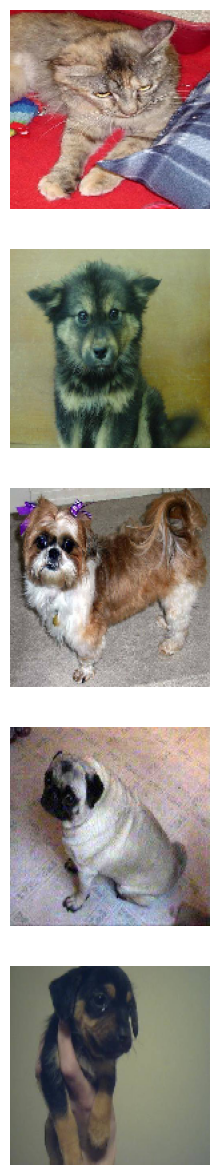

In [48]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [49]:
# 5
train_image_generator = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range = 15,
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    zoom_range = 0.15,
    horizontal_flip = True
    )


Found 2000 images belonging to 2 classes.


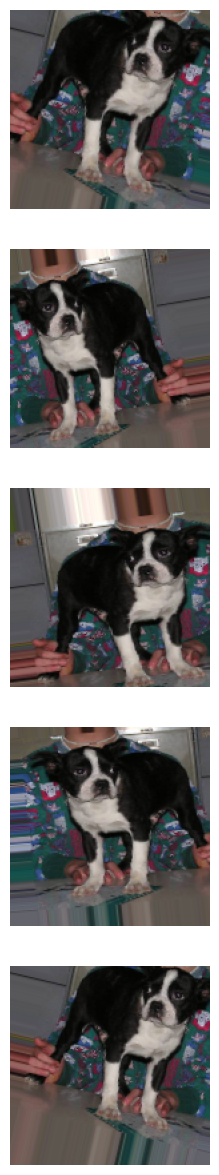

In [50]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)


In [ ]:
# 7
model = Sequential()
model.add(Conv2D(16, (5,5), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(Conv2D(16, (5,5), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2,2), strides=(2,2), padding='valid'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), padding='valid'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), padding='valid'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics = ['accuracy']
)
model.summary()

In [52]:
# 8
history = model.fit(
    train_data_gen,
    epochs = epochs,
    steps_per_epoch = 30,
    validation_data = val_data_gen,
    validation_steps = 15
    )

Epoch 1/18
30/30 [==============================] - 122s 4s/step - loss: 0.7145 - accuracy: 0.5080 - val_loss: 0.6931 - val_accuracy: 0.5010
Epoch 2/18
30/30 [==============================] - 124s 4s/step - loss: 0.6931 - accuracy: 0.5005 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 3/18
30/30 [==============================] - 116s 4s/step - loss: 0.6930 - accuracy: 0.4984 - val_loss: 0.6929 - val_accuracy: 0.4979
Epoch 4/18
30/30 [==============================] - 118s 4s/step - loss: 0.6933 - accuracy: 0.5016 - val_loss: 0.6927 - val_accuracy: 0.5010
Epoch 5/18
30/30 [==============================] - 117s 4s/step - loss: 0.6928 - accuracy: 0.5048 - val_loss: 0.6925 - val_accuracy: 0.5021
Epoch 6/18
30/30 [==============================] - 119s 4s/step - loss: 0.6929 - accuracy: 0.5192 - val_loss: 0.6909 - val_accuracy: 0.5063
Epoch 7/18
30/30 [==============================] - 116s 4s/step - loss: 0.6909 - accuracy: 0.5342 - val_loss: 0.6867 - val_accuracy: 0.5219
Epoch 8/18
30

ValueError: ignored

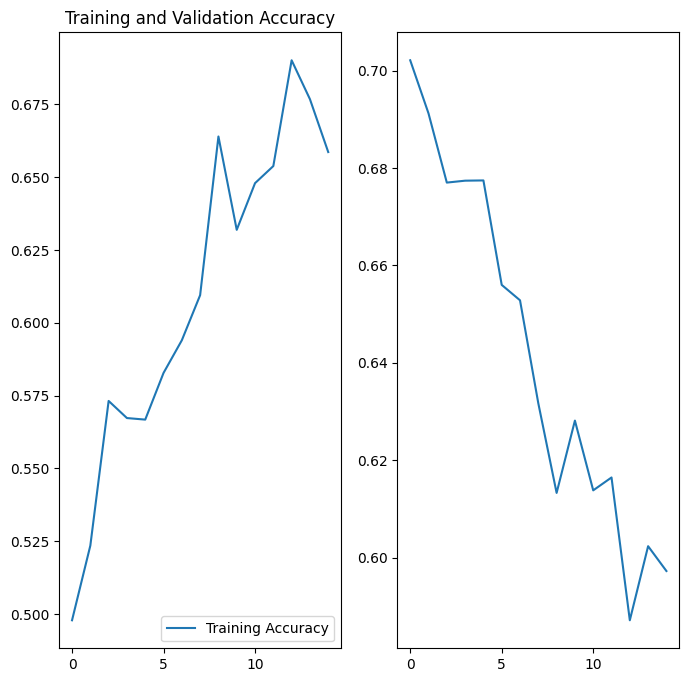

In [33]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#10

testProb = model.predict(test_data_gen)

PlotImages(testProb, probabilities=True)

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")